In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from scipy.special import expit

In [5]:
if os.path.exists('data/mnist.npz'):
    npzfile = np.load('data/mnist.npz')
    train_images_raw = npzfile['train_images_raw']
    train_labels = npzfile['train_labels']
    eval_images_raw = npzfile['eval_images_raw']
    eval_labels = npzfile['eval_labels']
else:
    import torchvision
    download_ = not os.path.exists('data/mnist.npz')
    data_train = torchvision.datasets.MNIST('mnist', train=True, transform=None, target_transform=None, download=download_)
    data_eval = torchvision.datasets.MNIST('mnist', train=False, transform=None, target_transform=None, download=download_)

    train_images_raw = data_train.data.numpy()
    train_labels = data_train.targets.numpy()
    eval_images_raw = data_eval.data.numpy()
    eval_labels = data_eval.targets.numpy()

    np.savez('data/mnist.npz', train_images_raw=train_images_raw, train_labels=train_labels,
             eval_images_raw=eval_images_raw, eval_labels=eval_labels)

FileNotFoundError: [Errno 2] No such file or directory: 'data/mnist.npz'

In [36]:
noise_flip_prob = 0.04
perform_computation = True

def show(image):
    for row_im in image:
        print(row_im.tolist())

In [16]:
def get_thresholded_and_noised(images_raw, threshold, flip_flags):
    """
    Thresholds image and flips pixels

    Parameters
    ----------
    images_raw: A numpy array. Do not assume anything about its shape, dtype or range of values. Your function should be careless about these attributes.
    threshold: A scalar value representing the cutoff threshold.
    flip_flags: A numpy array with the same shape as images_raw and np.bool dtype. This array indicates whether each pixel should be flipped or not.

    Returns
    -------
    some_features_normalized: A numpy array with shape (N_some, d).
    """

    # your code here
    mapped_noised_image =  np.logical_xor(images_raw >= threshold, flip_flags).astype(np.int32)
    mapped_noised_image[mapped_noised_image == 0] = -1

    assert (np.abs(mapped_noised_image)==1).all()
    return mapped_noised_image.astype(np.int32)

def test_thresh_noise(x, seed = 12345, p = noise_flip_prob, threshold = 128):
    np_random = np.random.RandomState(seed=seed)
    flip_flags = (np_random.uniform(0., 1., size=x.shape) < p)
    return get_thresholded_and_noised(x, threshold, flip_flags)

test_thresh_noise(train_images_raw)

array([[[-1, -1, -1, ..., -1, -1, -1],
        [-1, -1,  1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        ...,
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1,  1, ..., -1,  1, -1]],

       [[-1, -1, -1, ..., -1, -1,  1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1,  1],
        ...,
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1]],

       [[-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        ...,
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1,  1, -1],
        [-1, -1, -1, ..., -1, -1, -1]],

       ...,

       [[-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [ 1, -1, -1, ..., -1, -1, -1],
        ...,
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1

In [19]:
if perform_computation:
    X_true_grayscale = train_images_raw[:10, :, :]

    np_random = np.random.RandomState(seed=12345)
    flip_flags = flip_flags = (np_random.uniform(0., 1., size=X_true_grayscale.shape) < noise_flip_prob)
    initial_pi = np_random.uniform(0, 1, size=X_true_grayscale.shape) # Initial Random Pi values

    X_true = get_thresholded_and_noised(X_true_grayscale, threshold=128, flip_flags=flip_flags * 0)
    X_noised = get_thresholded_and_noised(X_true_grayscale, threshold=128, flip_flags=flip_flags)

In [24]:
def sigmoid_2x(X):
    """
    Computes the sigmoid_2x operation.

    Parameters
    ----------
    X: a numpy array that can have any shape

    Returns
    -------
    output: The function's output, in the same shape as X
    """

    # your code here
    output = expit(2*X)

    return output

assert sigmoid_2x(+np.inf) == 1.
assert sigmoid_2x(-np.inf) == 0.
assert np.array_equal(sigmoid_2x(np.array([0, 1])).round(3), np.array([0.5, 0.881]))

int32
float64
float64
[1.3977471384392742e-05, 2.560379449526934e-07, 2.5601536282323365e-07, 2.560098407838954e-07, 2.560098407838954e-07, 2.5601536276567283e-07, 2.560098407838954e-07, 2.5600984077237893e-07, 2.5600984077237893e-07, 2.5600984077238026e-07, 2.5600984139012403e-07, 2.5631146256322916e-07, 0.0001474399650058141, 2.5631146256322916e-07, 2.5600984139012403e-07, 2.5600984077238026e-07, 2.5600984077237893e-07, 2.5600984077237893e-07, 2.5600984077237893e-07, 2.5600984077237893e-07, 2.5600984077237893e-07, 2.5600984077237893e-07, 2.5600984077237893e-07, 2.5600984077237893e-07, 2.5600984077237893e-07, 2.560098408299385e-07, 2.5603794494117564e-07, 1.3977471384392742e-05]
[2.560379449413826e-07, 4.689086290879528e-09, 2.700842734305378e-06, 4.689076861062176e-09, 4.689076861062176e-09, 2.700842734305172e-06, 4.689076861058379e-09, 4.6889757223757744e-09, 4.688975722371977e-09, 4.688975722371977e-09, 4.6889757223719926e-09, 4.688975733893589e-09, 4.6945001100526345e-09, 4.688975

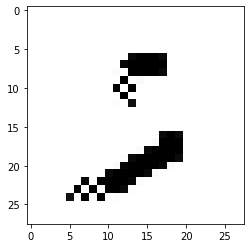

In [42]:
def boltzman_meanfield(images, initial_pi, theta_X=0.5*np.log(1/noise_flip_prob-1), theta_pi=2, iterations=100):
    """
    Implements the meanfield approximation to the Boltzman machine.

    Parameters
    ----------
    images: A numpy array with the shape (N,height,width).
    initial_pi: A numpy array with the same shape as images (i.e. (N,height,width)).
    theta_X: A scalar value representing 𝜃^(2)_ii.
    theta_pi: A scalar value representing 𝜃^(1)_ij.
    iterations: A scalar denoteing the number of update iterations to perform.

    Returns
    -------
    pi: A numpy array containing values only between 0 and 1.
    """

    if len(images.shape)==2:
        # In case a 2d image was given as input, we'll add a dummy dimension to be consistent
        X = images.reshape(1,*images.shape)
    else:
        # Otherwise, we'll just work with what's given
        X = images

    pi = initial_pi
    print(X.dtype)
    print(pi.dtype)
    print(theta_X.dtype)
    #print(theta_pi.dtype)
    # your code here
    N, r, c = X.shape
    N_rows = np.zeros((N,1,c), dtype='float64')
    N_cols = np.zeros((N,r,1), dtype='float64')
    for iter in range(iterations):
        pi_ = theta_pi * (2*pi - 1)
        pi_shift_down = np.concatenate([N_rows, pi_[:,0:-1,:]], axis=1)
        pi_shift_up = np.concatenate([pi_[:,1:,:], N_rows], axis=1)
        pi_shift_left = np.concatenate([pi_[:,:,1:], N_cols], axis=2)
        pi_shift_right = np.concatenate([N_cols, pi_[:,:,:-1]], axis=2)
        sum_neighbors = pi_shift_down + pi_shift_up + pi_shift_left + pi_shift_right
        term_to_be_sigmoid = (theta_X * X) + sum_neighbors
        
        pi = sigmoid_2x(term_to_be_sigmoid)
        #print(sum_neighbors.shape)


    return pi.reshape(*images.shape)

def test_boltzman(x, seed = 12345, theta_X=0.5*np.log(1/noise_flip_prob-1), theta_pi=2, iterations=100):
    np_random = np.random.RandomState(seed=seed)
    initial_pi = np_random.uniform(0,1, size=x.shape)
    return boltzman_meanfield(x, initial_pi, theta_X=theta_X,
                              theta_pi=theta_pi, iterations=iterations)

single_result = test_boltzman(X_noised[:, :, :])

plt.imshow(single_result[0], cmap='Greys')
show(single_result[0])